In [53]:
import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [54]:
%matplotlib inline

In [55]:
#data source for the condom distribution centers
con_dist = pd.read_csv("data_sources/condom_dist_u.csv", 
                       index_col = "Community Area Name")


#data set for female chlamydia
fchla = pd.read_csv("data_sources/chlamydia_females.csv", 
                    index_col = "Community Area Name")

#read in and label all csv files, make community area name the leftmost column

In [56]:
#group condom distribution sites csv file by community area
con_dist_group = con_dist.groupby(["Community Area Name"]).count() 

#get rid of all blank rows
con_dist_group.dropna(inplace = True) 

#rename # of condom centers column to be more clear
con_dist_group.rename(columns = {"Name" : "Number_of_Condom_Centers"},
                      inplace = True) 

#on_dist_group.head(5)

In [57]:
#merge condom distribution centers and female chlamydia datasets
con_fchla_merged = con_dist_group.join(fchla) 
con_fchla_merged.rename(columns = {"Incidence Rate 2013" : "Incidence_Rate_2013"}, inplace = True)
con_fchla_merged.rename(columns = {"Incidence Rate 2014" : "Incidence_Rate_2014"}, inplace = True)
con_fchla_merged.rename(columns = {"Cases 2013 Female 15-44" : "Cases_2013_Female"}, inplace = True)
con_fchla_merged.rename(columns = {"Cases 2014 Female 15-44" : "Cases_2014_Female"}, inplace = True)

con_fchla_merged = con_fchla_merged[['Number_of_Condom_Centers',
                                    "Incidence_Rate_2013",
                                    "Cases_2013_Female",
                                    "Incidence_Rate_2014",
                                    "Cases_2014_Female"]]

#con_fchla_merged.head()

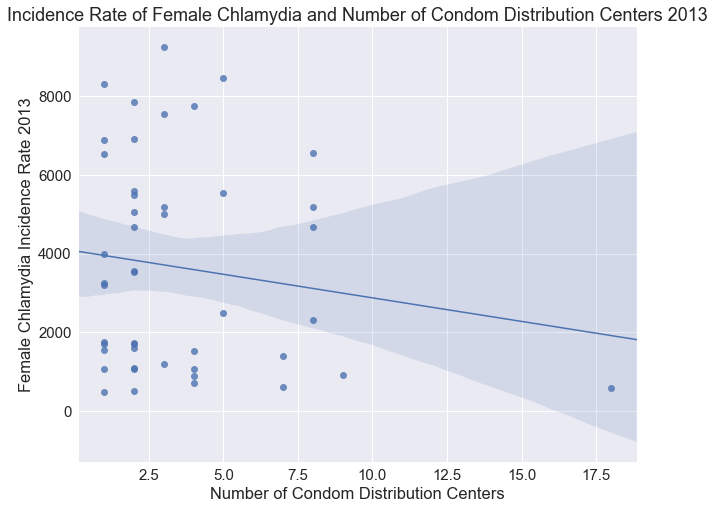

In [58]:

sns.set_context('notebook', 
                font_scale=1.5, 
                rc={"lines.linewidth": 1, 
                    "figure.figsize" : (10, 8)
                   }
               ) 

#create scatter plot to show relationship between # of condom sites and STI incidence rate
graph11 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Incidence_Rate_2013", 
                      data = con_fchla_merged)

graph11.set_ylabel("Female Chlamydia Incidence Rate 2013") #fix y axis label

graph11.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph11.set_title("Incidence Rate of Female Chlamydia and Number of Condom Distribution Centers 2013") # add label 

In [59]:
ols = smf.ols(formula = "Incidence_Rate_2013 ~ Number_of_Condom_Centers", 
              data = con_fchla_merged)

model = ols.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2013   R-squared:                       0.021
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.9266
Date:                 Thu, 30 Nov 2017   Prob (F-statistic):              0.341
Time:                         13:08:50   Log-Likelihood:                -426.97
No. Observations:                   46   AIC:                             857.9
Df Residuals:                       44   BIC:                             861.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4074.2057    588.180      6.927      0.000    2888.807    5259.604
Number_of_Condom_Centers  -119.8825    124.542     -0.963      0.341    -370.880     131.115
==============================================================================
Omnibus:                        8.494   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.014
Skew:                           0.483   Prob(JB):                        0.134
Kurtosis:                       1.923   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

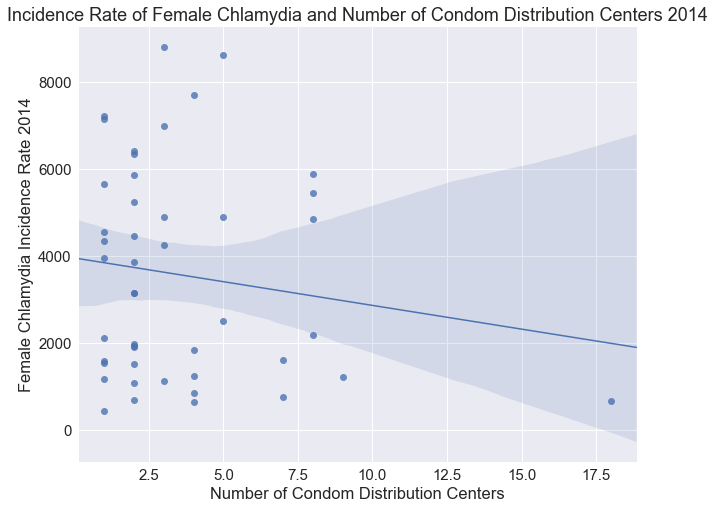

In [60]:
#create scatter plot to show relationship between # of condom sites and STI incidence rate
graph12 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Incidence_Rate_2014", 
                      data = con_fchla_merged) 

graph12.set_ylabel("Female Chlamydia Incidence Rate 2014") #fix y axis label

graph12.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph12.set_title("Incidence Rate of Female Chlamydia and Number of Condom Distribution Centers 2014") # add label 

In [61]:
ols = smf.ols(formula = "Incidence_Rate_2014 ~ Number_of_Condom_Centers", data = con_fchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2014   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.9188
Date:                 Thu, 30 Nov 2017   Prob (F-statistic):              0.343
Time:                         13:08:51   Log-Likelihood:                -422.92
No. Observations:                   46   AIC:                             849.8
Df Residuals:                       44   BIC:                             853.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3956.9820    538.526      7.348      0.000    2871.655    5042.309
Number_of_Condom_Centers  -109.2992    114.028     -0.959      0.343    -339.108     120.509
==============================================================================
Omnibus:                        5.297   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.410
Skew:                           0.490   Prob(JB):                        0.182
Kurtosis:                       2.096   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

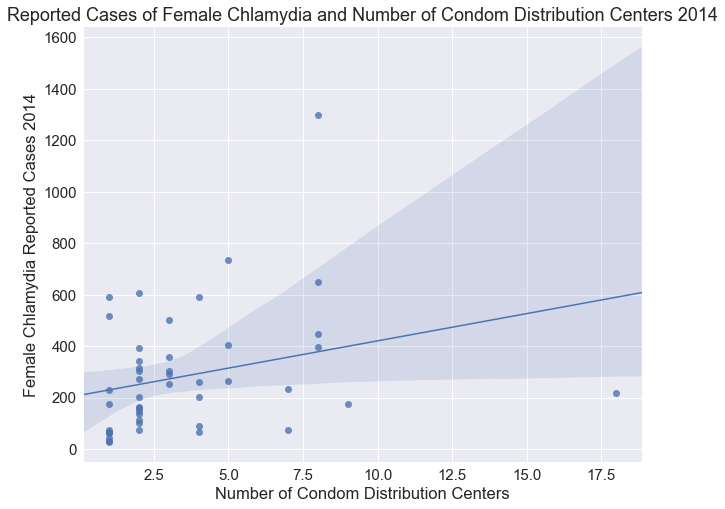

In [62]:
#create scatter plot to show relationship between # of condom sites and STI incidence rate
graph13 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Cases_2014_Female", 
                      data = con_fchla_merged) 

graph13.set_ylabel("Female Chlamydia Reported Cases 2014") #fix y axis label

graph13.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph13.set_title("Reported Cases of Female Chlamydia and Number of Condom Distribution Centers 2014") # add label 

In [63]:
ols = smf.ols(formula = "Cases_2014_Female ~ Number_of_Condom_Centers", data = con_fchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Cases_2014_Female   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     3.801
Date:                Thu, 30 Nov 2017   Prob (F-statistic):             0.0576
Time:                        13:08:51   Log-Likelihood:                -314.76
No. Observations:                  46   AIC:                             633.5
Df Residuals:                      44   BIC:                             637.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  209.0928     51.299      4.076      0.000     105.706     312.480
Number_of_Condom_Centers    21.1774     10.862      1.950      0.058      -0.714      43.069
==============================================================================
Omnibus:                       26.082   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.112
Skew:                           1.620   Prob(JB):                     1.31e-11
Kurtosis:                       6.955   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

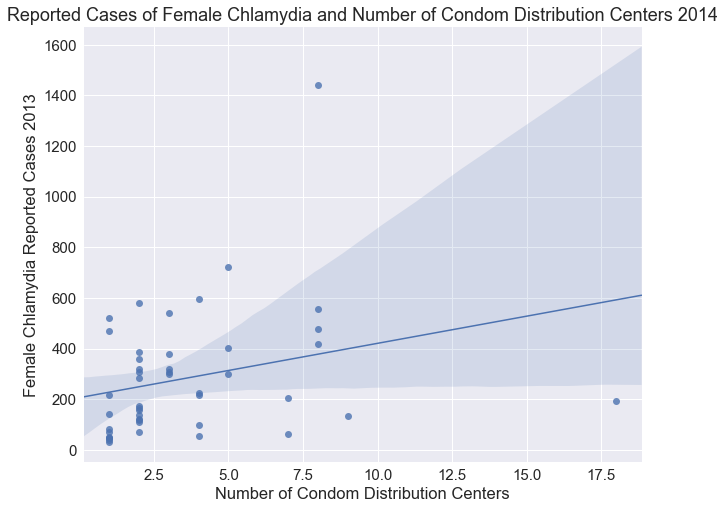

In [64]:
#create scatter plot to show relationship between # of condom sites and STI incidence rate
graph14 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Cases_2013_Female", 
                      data = con_fchla_merged) 

graph14.set_ylabel("Female Chlamydia Reported Cases 2013") #fix y axis label

graph14.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph14.set_title("Reported Cases of Female Chlamydia and Number of Condom Distribution Centers 2014") # add label 

In [65]:
ols = smf.ols(formula = "Cases_2013_Female ~ Number_of_Condom_Centers", data = con_fchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Cases_2013_Female   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.531
Date:                Thu, 30 Nov 2017   Prob (F-statistic):             0.0669
Time:                        13:08:52   Log-Likelihood:                -317.08
No. Observations:                  46   AIC:                             638.2
Df Residuals:                      44   BIC:                             641.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  206.1057     53.945      3.821      0.000      97.386     314.826
Number_of_Condom_Centers    21.4638     11.422      1.879      0.067      -1.557      44.484
==============================================================================
Omnibus:                       35.280   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.911
Skew:                           1.957   Prob(JB):                     3.69e-24
Kurtosis:                       9.401   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
graph11.figure.savefig('graphs/graph11.png')
graph12.figure.savefig('graphs/graph12.png')
graph13.figure.savefig('graphs/graph13.png')
graph14.figure.savefig('graphs/graph14.png')